# W9 Activity

In [3]:
# Setup
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

## Exercise 1

### Hough Circle Transform

In [227]:
img = cv.imread("coins_1.jfif")
cv.imshow('view', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [228]:
img = cv.imread("coins_1.jfif")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 1.5)

# hough circle transform
row = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/9, param1 = 150,
                        param2 = 40)
# method just use this one
# accumulator matrix too low = no circle, too high = many circles

# plot all the circles
if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        # draw circles center
        center = (i[0], i[1]) # get center
        cv.circle(img, center, 1, (100, 100, 255), 3)
        
        # draw the circle circumference 
        radius = i[2] # radius of circle
        cv.circle(img, center, radius, (0, 255, 0), 2)
        
cv.imshow('hough circle transform', img)
cv.waitKey(0)
cv.destroyAllWindows()

### Blob Detection

In [224]:
img = cv.imread('coins_1.jfif')
blur = cv.GaussianBlur(img, (7, 7), 1.5)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# parameter settings
params = cv.SimpleBlobDetector_Params()

In [226]:
params.filterByArea = False
params.filterByColor = False
params.filterByCircularity = True
params.minCircularity = 0.8
params.filterByConvexity = False
params.minConvexity = 0.8
params.filterByInertia = True
params.minInertiaRatio = 0.8
params.minRepeatability = 4

# create object detector
detector = cv.SimpleBlobDetector_create(params)
keypoint = detector.detect(gray)

# draw keypoint
img_with_keypoints = cv.drawKeypoints(img, keypoint, np.array([]), (0, 0, 255), 
                                     cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('blob', img_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

Both approaches could detect all the coins present in the image well. For Hough Circle Transform, there will be a centroid contained in each blob while for blob detection, the coins are circled without showing the centroid.
Also, for blob detection, we need extra effort to get all the coins detected. 

## Exercise 2

### 2a

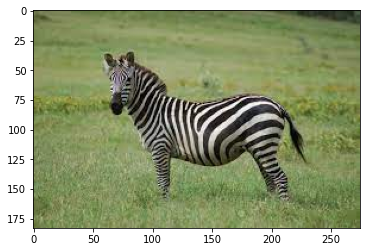

In [229]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_rgb)
plt.show()

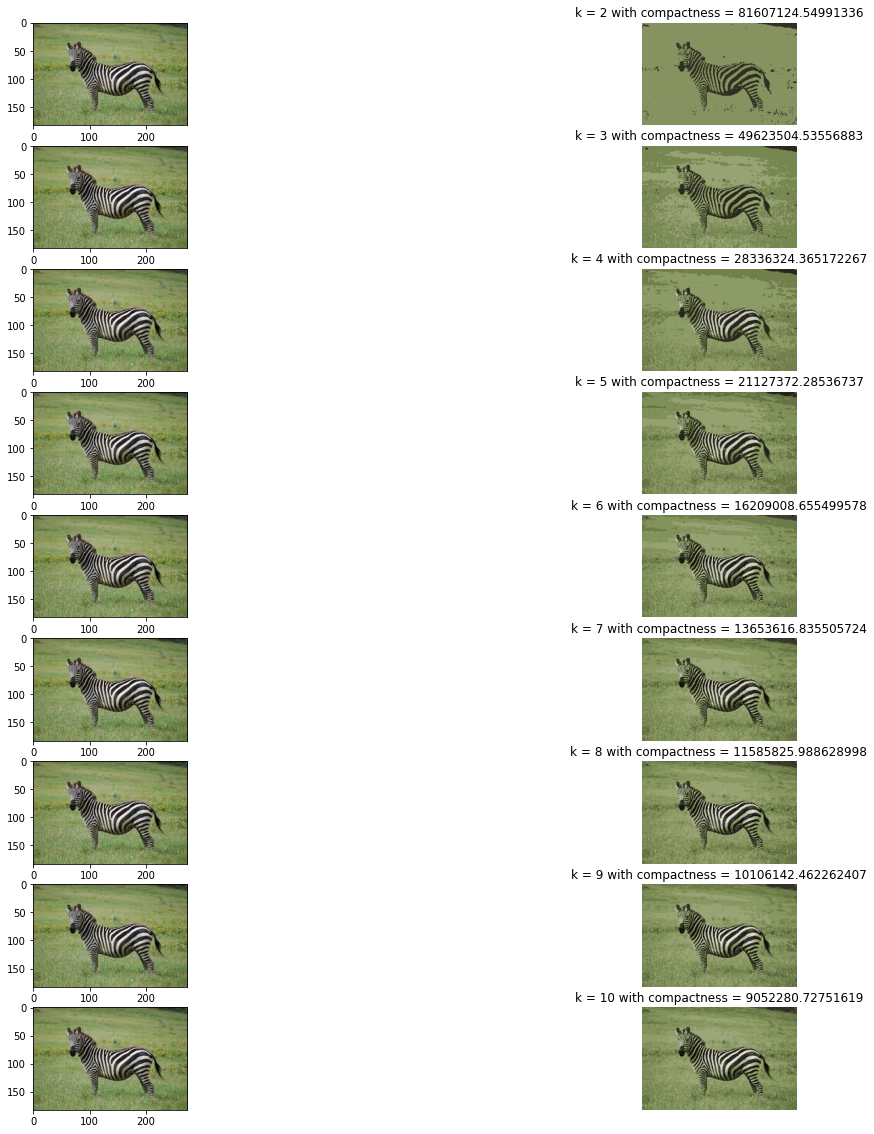

In [282]:
img_reshape = img_rgb.reshape((-1, 3)) #flatten the dimension from 2 to 1
img_reshape = np.float32(img_reshape)
results = []
sum_of_squared_distances = []

# k-means clustering
for k in range(2, 11):
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1)
    attempts = 10
    ret, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

    #reshape into original dimension
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img_rgb.shape))
    results.append(result_image)
    sum_of_squared_distances.append(ret)
    
f, ax = plt.subplots(9, 2, figsize = (20, 20))

for i in range(len(results)):
    ax[i][1].axis('off')
    ax[i][1].title.set_text('k = {0} with compactness = {1}'.format(i+2, sum_of_squared_distances[i]))
    ax[i][0].imshow(img_rgb, cmap='gray')
    ax[i][1].imshow(results[i], cmap='gray')
    
plt.show()

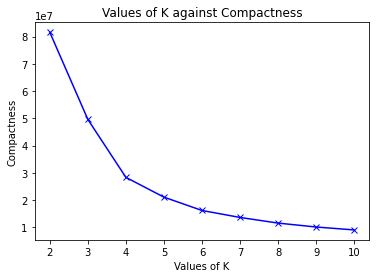

In [279]:
K = range(2, 11)

plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Compactness') 
plt.title('Values of K against Compactness')
plt.show()

The curve looks like an elbow. In the above plot, the elbow is at k = 4 (i.e. Sum of squared distances falls suddenly) indicating the optimal k for this kmeans clustering is 4.

### 2b

In [284]:
img = cv.imread('zebra.jfif')
img = cv.GaussianBlur(img, (3, 3), 0)

cv.imshow('image', img)
cv.waitKey(0)

32

In [285]:
# Convert the image to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# reshape and convert to float32
img_reshape = img_hsv.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K = 3

ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img = res.reshape(img_hsv.shape)

In [286]:
img_reshape_bgr = img.reshape((-1, 3))
img_reshape_bgr = np.float32(img_reshape_bgr)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K = 4

ret, label, center = cv.kmeans(img_reshape_bgr, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img_bgr = res.reshape(img.shape)

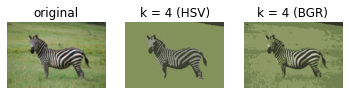

In [287]:
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original'), plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.title(f'k = {K} (HSV)'), plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result_img_bgr, cv.COLOR_BGR2RGB))
plt.title(f'k = {K} (BGR)'), plt.axis("off")
plt.show()

By looking at the plot, we can see that the HSV color space works better than BGR for kmeans clustering. This is because there is the HSV output contains no clutter background where the BGR output does.